<a href="https://colab.research.google.com/github/odailsono2/CHdocenteIFRNjc/blob/main/Relat%C3%B3rioBoasPr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise de Código - Projeto Boas Práticas

---

## Identificação

- **Aluno:** Odailson Cavalcante de Oliveira  
- **Disciplina:** Boas Práticas de Programação  
- **Professor:** Gibeon Soares de Aquino Junior  
- **Ferramentas de Análise Utilizadas:**  
  - [SpotBugs](https://spotbugs.github.io/)  
  - [Checkstyle](https://checkstyle.org/)  
  - [PMD](https://pmd.github.io/)  
  - [Link para apresentação em vídeo](https://youtu.be/k2Q13iKvSjg)

---

## Introdução

Este relatório apresenta uma análise do código-fonte do projeto open-source [TEAMMATES](https://github.com/TEAMMATES/teammates), como parte das atividades desenvolvidas na disciplina de Boas Práticas de Programação. O objetivo principal é avaliar a qualidade do código, identificar possíveis violações de boas práticas e propor melhorias fundamentadas em conceitos como **Clean Code**, **SOLID**, **GRASP**, e a aplicação de métricas de código.

A análise está dividida em duas partes principais:

1. **Parte I: Análise Estática e Inspeção Manual**
   - Utilização das ferramentas **SpotBugs**, **Checkstyle** e **PMD** para identificar problemas no código.
   - Inspeção manual do código para detectar não conformidades com as boas práticas discutidas em sala de aula.

2. **Parte II: Análise de Métricas de Código**
   - Avaliação quantitativa e qualitativa por meio de métricas de código.
   - Interpretação dos resultados para classificar trechos do código como exemplos positivos ou negativos de qualidade.

Além disso, este relatório inclui recomendações práticas para aprimorar o código analisado.



## Parte I - Análise Estática de Código

Foram testadas as ferramentas `SpotBugs`, `Checkstyle` e `PMD` para identificar problemas no código do fonte. Foi constatado também que `Spotebugs`, `Checkstyle` e `PMD` já estavam configuradas no arquivo `build.gradle`, conforme o trecho desse arquivo abaixo:

```python
def checkstyleVersion = "10.15.0"
def pmdVersion = "7.0.0"
def spotbugsVersion = "4.8.4"
```

**Ao executar as ferramentas, todas não apresentaram problemas ou alertas no código fonte.**

A título de verificação e para eliminar mau-funcionamento das ferramentas foi introduzido o seguinte trecho e verificado os resultados dos relatórios das três ferramentas. O trecho introduz um variável nula que deverá ser detectada pelas ferramentas.

---
```java
String str = null;
System.out.println(str.length()); // NullPointerException esperado

```

---
Após compilar os código com `./gradlew build` as três ferramentas identificaram o problema. Seguem-se os resultados:

## Compilação com erro introduzido propositalmente

Segue abaixo o resultado mostrado no terminal após o comando de compilação `.\gradlew build` para os problema de variáel nula propositalmente introduzido. Observa-se que as três ferramentas apontam o problema, indicando que estão funcionando adequadamente. Numa verificação dos arquivos de configurção não foram verificadas cláusulas de supressão com efeitos suprimir falhas importantes. Logo, as ferramentas estáticas podem não ser suficientes para detectar os problemas no código necessitando-se uma inspeção manual do código.

---
```shell
odailson@odailson-Nitro-AN515-57:/media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boa
s práticas/teammates$ ./gradlew build
Starting a Gradle Daemon, 2 busy Daemons could not be reused, use --status for details
/media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas práticas/teammates/src/main/java/teammates/main/Application.java:81:  SystemPrintln:  Usage of System.out/err
> Task :pmdMain FAILED

> Task :checkstyleMain
[ant:checkstyle] [ERROR] /media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas práticas/teammates/src/main/java/teammates/main/Application.java:82: Line has trailing whitespaces. [RegexpSinglelineJava]

> Task :checkstyleMain FAILED
> Task :spotbugsMain FAILED

> Task :printSpotbugsMainViolations
H C NP: Null pointer dereference of str in teammates.main.Application.main(String[])  Dereferenced at Application.java:[line 81]
L D NP: Load of known null value in teammates.main.Application.main(String[])  At Application.java:[line 81]

FAILURE: Build completed with 3 failures.

1: Task failed with an exception.
-----------
* What went wrong:
Execution failed for task ':pmdMain'.
> A failure occurred while executing org.gradle.api.plugins.quality.internal.PmdAction
   > 1 PMD rule violations were found. See the report at: file:///media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas%20pr%C3%A1ticas/teammates/build/reports/pmd/main.html

* Try:
> Run with --scan to get full insights.
==============================================================================

2: Task failed with an exception.
-----------
* What went wrong:
Execution failed for task ':checkstyleMain'.
> A failure occurred while executing org.gradle.api.plugins.quality.internal.CheckstyleAction
   > Checkstyle rule violations were found. See the report at: file:///media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas%20pr%C3%A1ticas/teammates/build/reports/checkstyle/main.html
     Checkstyle files with violations: 1
     Checkstyle violations by severity: [error:1]


* Try:
> Run with --scan to get full insights.
==============================================================================

3: Task failed with an exception.
-----------
* What went wrong:
Execution failed for task ':spotbugsMain'.
> A failure occurred while executing com.github.spotbugs.snom.internal.SpotBugsRunnerForHybrid$SpotBugsExecutor
   > Verification failed: SpotBugs ended with exit code 1. See the report at: file:///media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas%20pr%C3%A1ticas/teammates/build/reports/spotbugs/main.html, file:///media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas%20pr%C3%A1ticas/teammates/build/reports/spotbugs/main.txt, file:///media/odailson/Arquivos/OneDrive-IFRN-Ubuntu/TI-IMD/boas%20pr%C3%A1ticas/teammates/build/reports/spotbugs/main.xml

* Try:
> Run with --stacktrace option to get the stack trace.
> Run with --info or --debug option to get more log output.
> Run with --scan to get full insights.
> Get more help at https://help.gradle.org.
==============================================================================

Deprecated Gradle features were used in this build, making it incompatible with Gradle 9.0.

You can use '--warning-mode all' to show the individual deprecation warnings and determine if they come from your own scripts or plugins.

For more on this, please refer to https://docs.gradle.org/8.7/userguide/command_line_interface.html#sec:command_line_warnings in the Gradle documentation.

BUILD FAILED in 38s
14 actionable tasks: 11 executed, 3 up-to-date
```
---


## Relatório `SpotBugs`

### Com null pointer introduzido

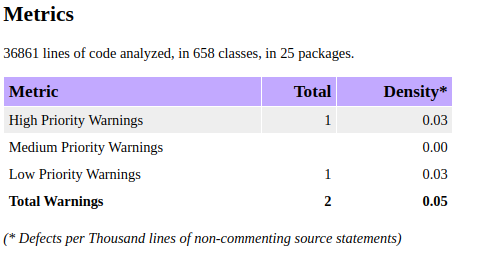

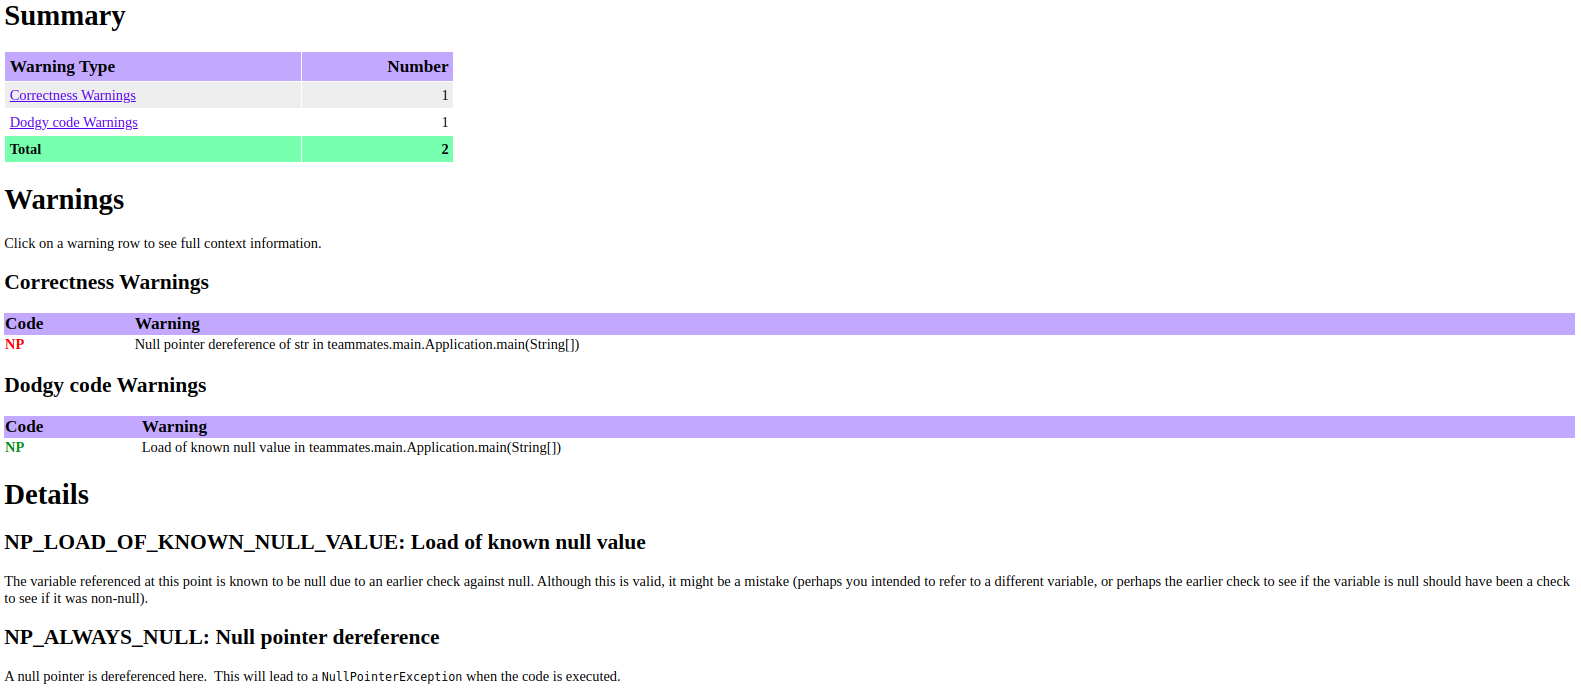

### Cógido Original

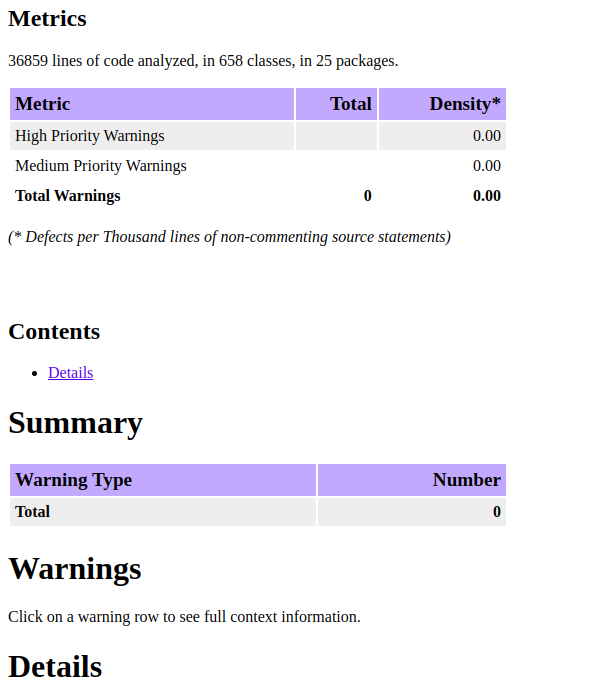

## Relatório `CheckStyle`

### Com null pointer introduzido
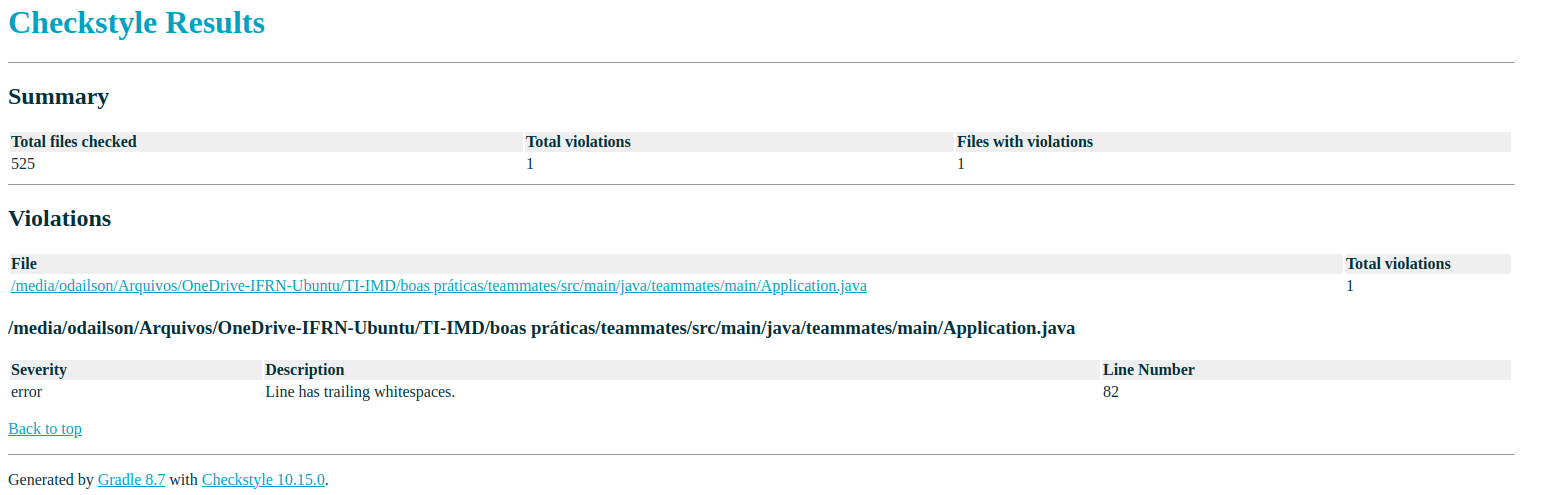

### Cógido Original

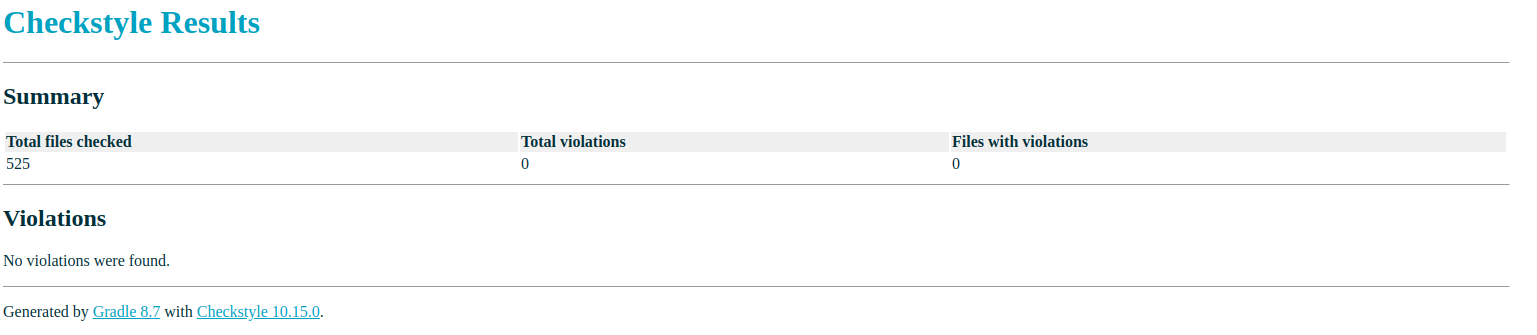

## Relatórios `PMD`

### Com null pointer intorduzido
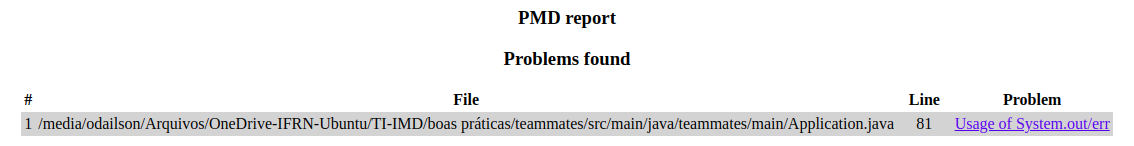

### Cógido Original
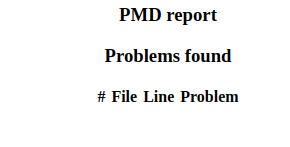

## Conclusão da Análise Estático com as Ferramentas `SpotBugs`, `CheckStyle` e `PMD`

Durante o uso das ferramentas verificou-se o funcionamento destes, um inspenção de suas configurações mostrou que não havia supressão de alertas que poderia levar a falsos negativos (inexistência de código ruins). Ao executar a inspeção, não houve alertas de problemas. Logo, concluí-se que possivelmente o código apresenta implementação com uso de boas-práticas de programação, pelos menos em nível que as ferramentas de análise não conseguiram localizaram. No entanto, uma inspeção manual do código fonte pode conduzir a uma análise mais refinada e apresentar resultados positivos.

### Análise II - Inspeção manual do código (Clean Code, SOLID e GRASP)

Seguem-se abaixo os três trechos escolhidos que infrigem algum princípio de boas práticas de programação. Os techos foram escolhidos com base numa inspeção por amostragem dos arquivos de código fonte do TEAMMATES.

---
### **Problema 1: Falta de validação de consistência em `FeedbackSession`**

### **Localização**
- **Arquivo:** `teammates/storage/entity/FeedbackSession.java`
- **Método:** `FeedbackSession(String sessionId, String courseId, Instant startTime, Instant endTime)`

### **Trecho Problemático**
---
```java
public FeedbackSession(String sessionId, String courseId, Instant startTime, Instant endTime) {
    this.sessionId = sessionId;
    this.courseId = courseId;
    this.startTime = startTime;
    this.endTime = endTime;
}
```

Não há verificação de das variáveis `starttime` e `endTime`. Isso pode permitir que o horário de término seja anterior ao de início ou que sejam nulos. Se esse trecho for mantido assim poderá resultar em inconsistência na criação de sessões.

### Solução sugerida
---

```java
public FeedbackSession(String sessionId, String courseId, Instant startTime, Instant endTime) {
   // --------SUGESTÂO para verificar a se endTime é posteiror a startTime e se são nulos
    if (startTime != null && endTime != null && startTime.isAfter(endTime)) {
        throw new IllegalArgumentException("endTime deve ser posterior a startTime.");
    }
  //------FIM da SUGESTãO
    this.sessionId = sessionId;
    this.courseId = courseId;
    this.startTime = startTime;
    this.endTime = endTime;
}
```

Assim é possível garantir que o método `FeedbackSession` lance uma excessão caso ocorra inconsistência entre `endTime` e `startTime`.

---
## **Problema 2: Falta de validação para atributos obrigatórios em `Course`**

### **Localização**
- **Arquivo:** `teammates/storage/entity/Course.java`
- **Método:** Construtor da classe `Course`

---

### **Trecho Problemático**

O construtor permite que atributos obrigatórios, como `id` e `name`, sejam nulos ou vazios, sem qualquer validação. Isso pode levar a inconsistências na aplicação.

```java
public Course(String id, String name, String timeZone, String institute) {
    this.id = id;
    this.name = name;
    this.timeZone = timeZone;
    this.institute = institute;
}
```

### **Solução**

Aplicar validação dos atributos:

---

```java
public Course(String id, String name, String timeZone, String institute) {
  //------Aplica teste de null ou vazio para os campos id e name
  // -------Lança excessões
    if (id == null || id.isEmpty()) {
        throw new IllegalArgumentException("Course ID cannot be null or empty.");
    }
    if (name == null || name.isEmpty()) {
        throw new IllegalArgumentException("Course name cannot be null or empty.");
    }

  //-----fim da sugestão  
    this.id = id;
    this.name = name;
    this.timeZone = timeZone;
    this.institute = institute;
}
```



---
## **Problema 3: Construtor sem BUILDER**


### **Localização**
- **Arquivo:** `teammates/storage/entity/FeedbackSession.java`
- **Classe:** ` FeedebackSession`

---
### **Trecho Problemático**

```java
public class FeedbackSession {
    private String sessionId;
    private String courseId;
    private Instant startTime;
    private Instant endTime;

    public FeedbackSession(String sessionId, String courseId, Instant startTime, Instant endTime) {
        this.sessionId = sessionId;
        this.courseId = courseId;
        this.startTime = startTime;
        this.endTime = endTime;
    }
}

```

A classe `FeedbackSession` possui um construtor que recebe muitos parâmetros, o que dificulta sua legibilidade e manutenção. Isso viola princípios de boas práticas, como **Clean Code**, e torna a classe suscetível a erros na criação de objetos.

---
### **Solução**

O padrão Builder resolve esses problemas, permitindo a criação de objetos de forma flexível e legível. A implementação do Builder torna o código mais modular e reduz o risco de erros.

```java
public class FeedbackSession {
    private String sessionId;
    private String courseId;
    private Instant startTime;
    private Instant endTime;

    // Construtor usando Builder
    private FeedbackSession(Builder builder) {
        this.sessionId = builder.sessionId;
        this.courseId = builder.courseId;
        this.startTime = builder.startTime;
        this.endTime = builder.endTime;

        if (startTime != null && endTime != null && startTime.isAfter(endTime)) {
            throw new IllegalArgumentException("endTime deve ser posterior a startTime.");
        }
    }

    public static Builder builder() {
        return new Builder();
    }

    // classe Builder estatica interna
    public static class Builder {
        private final String sessionId;
        private final String courseId;
        private Instant startTime;
        private Instant endTime;

        public Builder(){       
        }

        public Builder setSessionId(String sessionId) {
            this.sessionId = sessionId;
            return this;

        }

        public Builder setCourseID(String sessionId, String courseId) {
            this.courseId = courseId;
            return this;
        }

        public Builder setStartTime(Instant startTime) {
            this.startTime = startTime;
            return this;
        }

        public Builder setEndTime(Instant endTime) {
            this.endTime = endTime;
            return this;
        }

        public FeedbackSession build() {
            return new FeedbackSession(this);
        }
    }
}

```

O código proposto cria objetos `FeedbackSession` de forma mais clara, e permite configurar apenas os atributos necessários, adicionando valores opcionais conforme necessário. Também foram introduzidas regras de validação (como startTime ser menor que endTime) antes da criação do objeto.



---
## Parte II: Análise das Métricas de Código

### Avaliação das métricas de código com apoio das ferramentas de métricas

Nesta parte do relatório será apresentado a análise das métricas de qualidade do código do projeto TEAMMATES, utilizando a ferramenta CK (Chidamber and Kemerer Java Metrics). A análise se concentra em três métricas principais: CBO (Coupling Between Objects), WMC (Weighted Methods per Class) e LCOM (Lack of Cohesion of Methods). Estas métricas fornecem indicadores sobre acoplamento, complexidade e coesão das classes, permitindo identificar potenciais problemas de projeto e manutenção.

### **Coleta de Dados:**

A ferramenta CK foi utilizada para calcular as métricas diretamente a partir do código-fonte do projeto TEAMMATES.
Os resultados foram gerados em arquivos CSV (class.csv, variable.csv, field.csv e method.csv), contendo informações detalhadas. Para análise será apenas considerado o arquivo class.csv


### **Métricas Selecionadas:**

As métricas selecionadas para análise foram:

- CBO (Coupling Between Objects)
- WMC (Weighted Methods per Class)
- LCOM (Lack of Cohesion of Methods)

Critérios de Avaliação: As métricas foram interpretadas com base em valores críticos que indicam possíveis problemas:

- CBO > 10: Alto acoplamento, dificultando reutilização e testes.
- WMC > 20: Alta complexidade, indicando necessidade de refatoração.
- LCOM > 0.8: Baixa coesão, indicando que a classe pode estar assumindo responsabilidades múltiplas.


### **Descrição das Métricas**
#### **CBO (Coupling Between Objects)**

**Definição:**

Mede o número de classes externas com as quais uma classe tem dependências diretas.
Um alto valor de CBO indica que a classe está fortemente acoplada a outras, reduzindo sua reutilização e aumentando a dificuldade de manutenção.

**Interpretação:**

- CBO Baixo: Boa modularidade e independência.

- CBO Alto: Dificuldade de testes e alto risco de impactos em mudanças.

#### **WMC (Weighted Methods per Class)**
**Definição:**

Soma das complexidades de todos os métodos de uma classe.
Reflete a carga cognitiva necessária para entender a lógica de uma classe.
Interpretação:

- WMC Baixo (<10): Classe simples, fácil de manter e entender.
- WMC Médio (10-20): Classe de complexidade moderada.
- WMC Alto (>20): Classe muito complexa, recomendando-se refatoração.

#### **LCOM (Lack of Cohesion of Methods)**
**Definição:**

Mede a coesão entre os métodos de uma classe, com base no número de atributos compartilhados.
Quanto maior o LCOM, menor a coesão, indicando que os métodos de uma classe realizam tarefas independentes.

Interpretação:

- LCOM Baixo (<0.5): Alta coesão, boa estruturação.
- LCOM Médio (0.5-0.8): Coesão aceitável.
- LCOM Alto (>0.8): Métodos desconectados, sugerindo divisão da classe.

### Analise de Dados

A ferramenta de extração e cálculos de métricas CK produz arquivos csv que serão analisados através dos datagramas do **Pandas e Matplotlib do Python**. Segue-se os código utilizados:


In [ ]:
# Carregar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


In [ ]:
# Ler o arquivo CSV carregados no drive
dfclass = pd.read_csv('/content/drive/MyDrive/TI-IMD/BoasPraticas/class.csv')
# dfmethod = pd.read_csv('/content/drive/MyDrive/TI-IMD/BoasPraticas/method.csv')
# dfvariable = pd.read_csv('/content/drive/MyDrive/TI-IMD/BoasPraticas/variable.csv')
# dffield = pd.read_csv('/content/drive/MyDrive/TI-IMD/BoasPraticas/field.csv')

## Tabela com as classes e suas métricas cbo, wmc, lcom*

In [ ]:
# Imprimindo tabela com as cinco primeiras linhas com as colunas das métricas
dfclass[['class','cbo','wmc','lcom*']].head()
# dfclass[['file','class','cbo','wmc','lcom*','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head()


,class,cbo,wmc,lcom*
0,teammates.storage.search.SearchManagerFactory,3,10,0.714286
1,teammates.common.datatransfer.AttributesDeleti...,2,13,0.062500
2,teammates.ui.request.FeedbackQuestionBasicRequest,8,47,0.862319
3,teammates.common.datatransfer.attributes.Instr...,20,66,0.809524
4,teammates.storage.api.InstructorsDb,18,69,0.957143


## Análise das métricas CBO, WMC, LCOM

Neste tópico iremos agrupar as classes que simultaneamente possuem maior acoplamento, maior falta de coesão e maior complexidade. Com isso poderemos isolar as classes mais críticas que necessitam de intervenção. Segue-se a seguir tabelas ordenadas pela cbo e wmc, respectivamente. Será listada também o número de métodos totais, estáticos e públicos que podem ser usados para análises adicionais.

In [ ]:
print("Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo wmc)")
metrica_comparativo = dfclass[(dfclass['cbo'] > 10) & (dfclass['wmc'] > 20) & (dfclass['lcom*'] > 0.8)].sort_values('wmc', ascending=False)
metrica_comparativo[['class','cbo','wmc','lcom*','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head(5)



Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo wmc)


,class,cbo,wmc,lcom*,totalMethodsQty,staticMethodsQty,publicMethodsQty
159,teammates.logic.api.Logic,43,289,0.929121,130,1,129
557,teammates.sqllogic.api.Logic,45,231,0.929464,160,1,158
88,teammates.sqllogic.core.FeedbackResponsesLogic,27,202,0.817778,45,1,29
78,teammates.logic.core.FeedbackResponsesLogic,31,196,0.829932,49,1,29
416,teammates.sqllogic.core.UsersLogic,31,164,0.910511,64,2,51


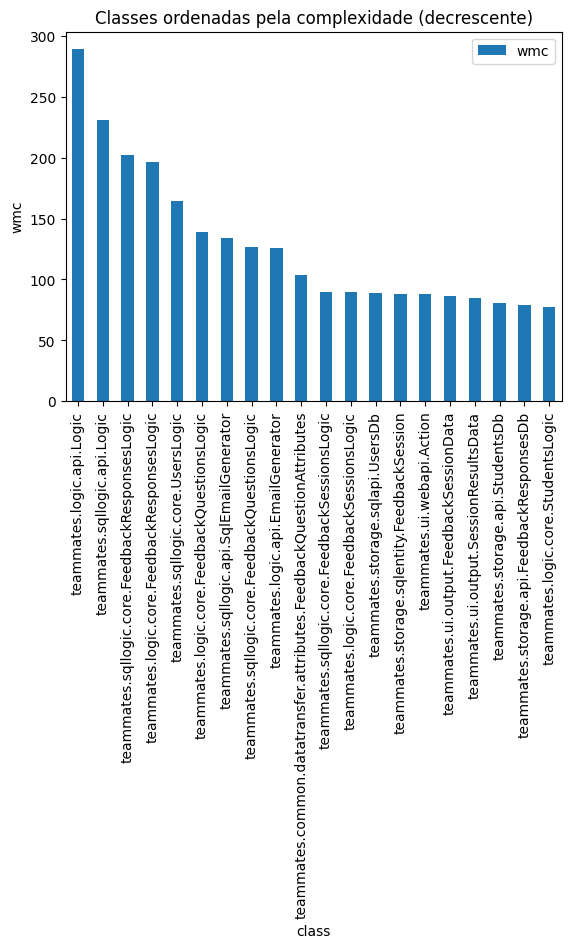

In [ ]:
# Plotar as classes pelo WMC
metrica_comparativo.head(20).sort_values('wmc', ascending=False).plot(
    x='class', y='wmc', kind='bar', title='Classes ordenadas pela complexidade (decrescente)')
plt.ylabel('wmc')
plt.show()


In [ ]:
print("Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo cbo)")
metrica_comparativo = dfclass[(dfclass['cbo'] > 10) & (dfclass['wmc'] > 20) & (dfclass['lcom*'] > 0.8)].sort_values('cbo', ascending=False)
metrica_comparativo[['class','cbo','wmc','lcom*','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head(5)



Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo cbo)


,class,cbo,wmc,lcom*,totalMethodsQty,staticMethodsQty,publicMethodsQty
577,teammates.common.util.HibernateUtil,49,27,0.904762,21,20,18
557,teammates.sqllogic.api.Logic,45,231,0.929464,160,1,158
159,teammates.logic.api.Logic,43,289,0.929121,130,1,129
367,teammates.logic.core.DataBundleLogic,33,48,0.896826,21,1,4
232,teammates.ui.webapi.Action,32,88,0.938095,40,0,16


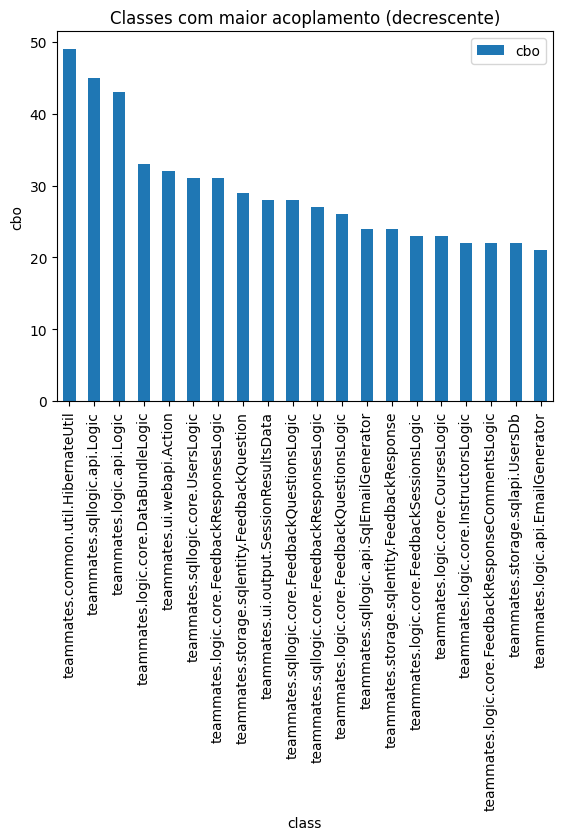

In [ ]:
# Plotar as classes pelo CBO
metrica_comparativo.head(20).sort_values('cbo', ascending=False).plot(
    x='class', y='cbo', kind='bar', title='Classes com maior acoplamento (decrescente)')
plt.ylabel('cbo')
plt.show()


### Análise:

Observando-se as tabela e gráficos anteriores, percebe-se que as cinco primeiras classes apresentam o nível de complexidade das classes entre 160 e 290, cbo acima de 30 e a falta de coesão entre 0.8 e 0.93. Esses indicadores em conjunto mostram que as classes listadas podem estar violando princípios como:

- Falta de Encapsulamento: a classe expõe diretamente seus atributos ou métodos internos, tornando-a dependente de classes externas. Isso pode ser indicado pelo elevado número de métodos públicos também, no caso da classe `teammates.logic.api.Logic` e `teammates.sqllogic.api.Logic	`

- Falta de Abstração (Violação de DIP - Dependency Inversion Principle): em vez de depender de abstrações (interfaces), a classe depende de implementações concretas, dificultando alterações no código.

- Responsabilidades Multiplas: acumula várias responsabilidades, pode-se ver que o número de métodos públicos é elevado em algumas classes.

- Uso Exagerado de Dependências Globais: a classe depende de muitas variáveis globais, métodos estáticos.

- Métodos Longos e Complexos: os métodos são excessivamente longos e contêm lógica complexa, dificultando o entendimento.

- Falta de Modularidade: métodos que poderiam ser divididos em funções menores são mantidos como uma única unidade, dificultando a reutilização e os testes.

- Acoplamento Interno Excessivo: os métodos dentro da classe têm muitas dependências entre si, dificultando alterações isoladas.

- Métodos Não Relacionados: os métodos da classe realizam tarefas independentes e não colaboram entre si.

**Ação Recomendada:**

- Deve-se verificar os métodos públicos se todos são realmente necessários na interface pública.

- Talves seja possível mover funcionalidades específicas para outras classes para reduzir o número de métodos públicos.

**Impactos das Violações**
- Dificuldade de Manutenção: Classes altamente acopladas, complexas e com baixa coesão são difíceis de entender e corrigir.

- Redução na Reutilização: Classes com alto CBO ou LCOM não podem ser facilmente reutilizadas em outros contextos.

- Aumento no Risco de Bugs: Alterações em uma parte do código podem impactar outras áreas inesperadamente devido ao alto acoplamento e baixa coesão.

- Dificuldade de Testes: Testar classes com WMC elevado ou métodos não coesos requer muito esforço, pois o comportamento é difícil de isolar.


Foi possível observar também que as classes `teammates.sqllogic.api.Logic` e `teammates.sqllogic.api.Logic` aparecem em nas primeiras posições de dois gráficos e tabelas, indicando que ela necessita de intervenções. Os valores de complexidade wmc, cbo e lcom* mostram que essas classes devem ter forte acoplamento, ferem o princípio de responsabilidade única e podem ser subdivididas em classes menores com responsabilidades bem definidas e únicas.

## Listando os melhores casos

Segue-se abaixo as tabelas e gráficos com os indicadores cbo, wmc e lcom para os melhores implementações.

In [ ]:
print("Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo wmc)")
metrica_comparativo = dfclass[(dfclass['cbo'] < 10) & (dfclass['wmc'] < 20) & (dfclass['lcom*'] < 0.8)].sort_values('wmc', ascending=False)
metrica_comparativo[['class','cbo','wmc','lcom*','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head(5)



Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo wmc)


,class,cbo,wmc,lcom*,totalMethodsQty,staticMethodsQty,publicMethodsQty
44,teammates.ui.output.SessionResultsData$Respons...,8,19,0.000000,19,0,0
168,teammates.ui.output.FeedbackResponseCommentData,7,19,0.760684,13,0,12
344,teammates.ui.request.NotificationBasicRequest,3,19,0.769231,13,0,13
380,teammates.common.datatransfer.questions.Feedba...,6,18,0.000000,7,0,7
499,teammates.ui.webapi.GetNotificationsAction,8,18,0.666667,3,0,1


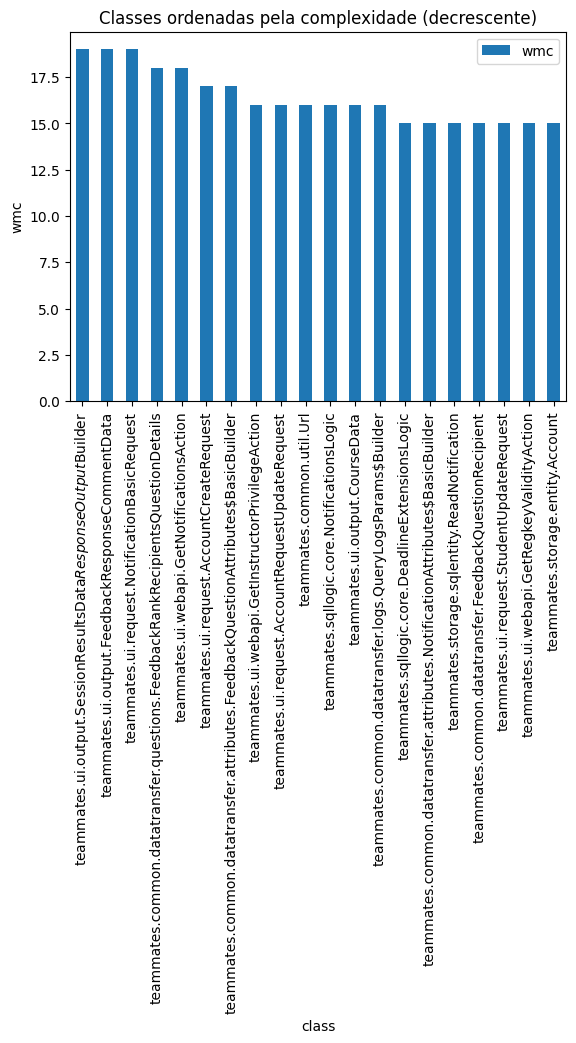

In [ ]:
# Plotar as classes pelo WMC
metrica_comparativo.head(20).sort_values('wmc', ascending=False).plot(
    x='class', y='wmc', kind='bar', title='Classes ordenadas pela complexidade (decrescente)')
plt.ylabel('wmc')
plt.show()

In [ ]:
print("Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo cbo)")
metrica_comparativo = dfclass[(dfclass['cbo'] < 10) & (dfclass['wmc'] < 20) & (dfclass['lcom*'] < 0.8)].sort_values('cbo', ascending=False)
metrica_comparativo[['class','cbo','wmc','lcom*','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head(5)



Tabela: Indicadores CBO, WMC, LCOM* e quantidade de métodos (ordenado pelo cbo)


,class,cbo,wmc,lcom*,totalMethodsQty,staticMethodsQty,publicMethodsQty
452,teammates.ui.webapi.BinCourseAction,9,7,0.00,3,0,1
595,teammates.ui.webapi.BinFeedbackSessionAction,9,8,0.00,4,0,1
548,teammates.storage.sqlapi.FeedbackSessionLogsDb,9,10,0.75,4,1,3
94,teammates.common.util.JsonUtils$UserAdapter,9,4,0.00,2,0,2
113,teammates.ui.webapi.GetFeedbackSessionSubmitte...,9,5,0.00,3,0,1


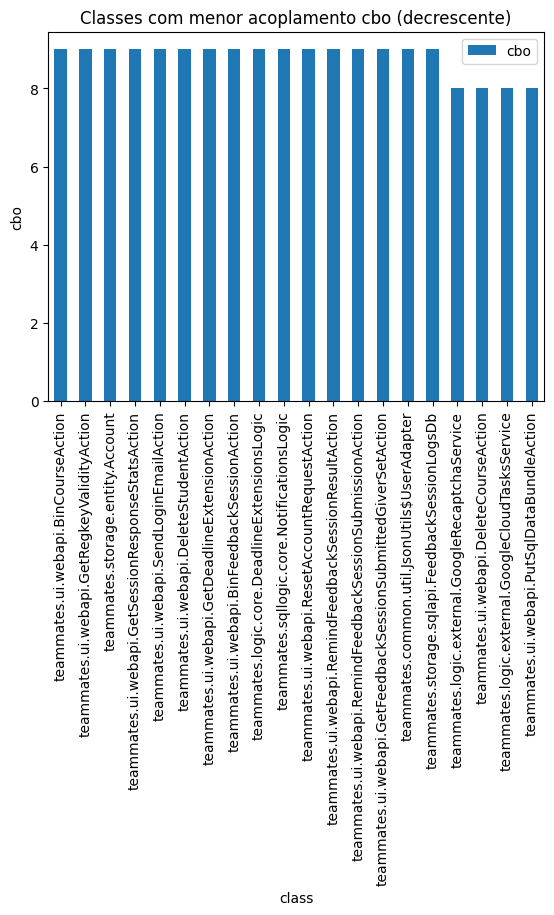

In [ ]:
# Plotar as classes pelo CBO
metrica_comparativo.head(20).sort_values('cbo', ascending=False).plot(
    x='class', y='cbo', kind='bar', title='Classes com menor acoplamento cbo (decrescente)')
plt.ylabel('cbo')
plt.show()


## Análise de métricas (melhores casos)

Os resultados acima nas tabelas e gráficos indicam as classes mais bem estruturadas do código. Elas forma obtidas com base nos cbo, wmc e lcom abaixo dos valores críticos definidos, 10, 20 e 0.8, respectivamente. As classe parecem coesas, com baixo nível de complexidade e independentes. Ao se observar a quantidade de métodos, staticos e públicos, percebe-se que são poucos, o que indica também o baixo acoplamento entre objetos, a responsabilidade única da classes.

## Análise II – Análise Geral/Estatística

Nesta seção será feita analise estatística do código fonte com base nas métricas já utilizadas cbo, wmc e lcom*, bem como o número de métodos publicos e estáticos. Segue-se

In [ ]:
# Estatísticas gerais
# Ler o arquivo CSV carregados no drive
df = pd.read_csv('/content/drive/MyDrive/TI-IMD/BoasPraticas/class.csv')
media_cbo = df['cbo'].mean()
media_wmc = df['wmc'].mean()
media_lcom = df['lcom*'].mean()
total_metodos = df['totalMethodsQty'].sum()

print(f"Média CBO: {media_cbo}")
print(f"Média WMC: {media_wmc}")
print(f"Média LCOM*: {media_lcom}")
# Desvio padrão das métricas
std_cbo = df['cbo'].std()
std_wmc = df['wmc'].std()
std_lcoms = df['lcom*'].std()

print(f"Desvio padrão do CBO: {std_cbo}")
print(f"Desvio padrão do WMC: {std_wmc}")
print(f"Desvio padrão do lcom*: {std_lcoms}")


print(f"Total de Métodos: {total_metodos}")


Média CBO: 7.368839427662957
Média WMC: 16.257551669316374
Média LCOM*: 0.3504328085179153
Desvio padrão do CBO: 8.310881253982997
Desvio padrão do WMC: 27.938235922838935
Desvio padrão do lcom*: 0.3692603953989262
Total de Métodos: 5204


## Analise das médias do cbo, wmc e lcom*

Como é possível analisar nos valores médios de cbo, wmc e lcom*, o código fonte do projeto TEAMMEATE, ele no geral é coeso lcom medio menor que 0.8, moderadamente desacoplado cbo medio menor que 10, e inferior, porém perto limite de complexidade crítica definido wmc medio igual à 20. Essa avalição geral omite os outliers, valores que não respeitam a média, que é o caso das classes analisadas nas seções anteriores. As medidas de desvio padrão indica como algumas classes estão longe da média em termos de complexidade em relação os demais desvios do cbo e lcom. A seguir será mostrada mais sobre os outliers de classes.

### **Analisando classes com CBO (Acoplamento) e número de métodos**:

Escolheu-se nessa seção realizar um comparativo entre classes com cbo > 10 que estão excessivamente acopladas e o número de métodos totais, publicos e estáticos. Segue-se a primeira duas tabela com os piores e melhores casos:

In [ ]:
# linhas ordenadas pelo CBO decrescente
high_cbo = dfclass[dfclass['cbo'] > 10].sort_values('cbo', ascending=False)
print("Classes com alto acoplamento:")
# high_cbo.head()
print("Tabela: Indicadores CBO e quantidade de métodos (Piores casos)")
high_cbo[['class','cbo','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head()



Classes com alto acoplamento:
Tabela: Indicadores CBO e quantidade de métodos (Piores casos)


,class,cbo,totalMethodsQty,staticMethodsQty,publicMethodsQty
610,teammates.ui.webapi.ActionFactory,121,4,3,1
577,teammates.common.util.HibernateUtil,49,21,20,18
557,teammates.sqllogic.api.Logic,45,160,1,158
159,teammates.logic.api.Logic,43,130,1,129
367,teammates.logic.core.DataBundleLogic,33,21,1,4


In [ ]:
import seaborn as sns

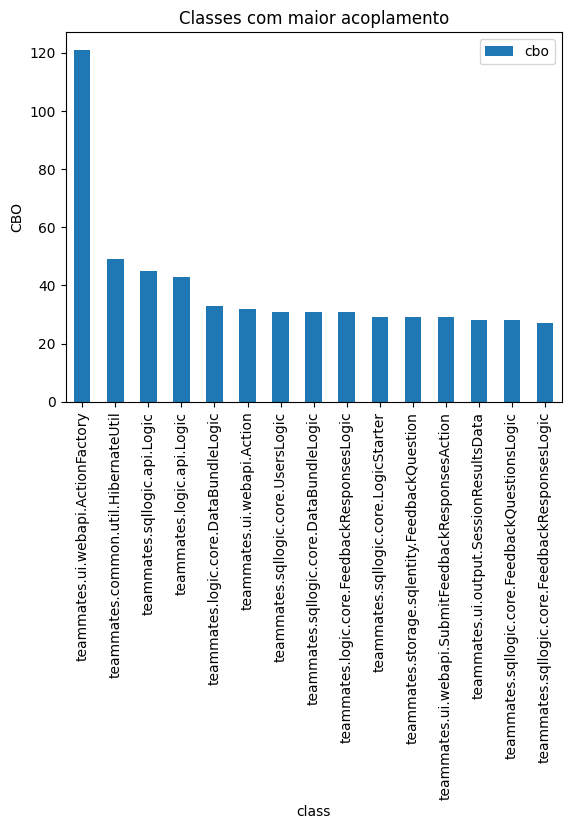

In [ ]:
# Plotar as classes pelo CBO 15 primeiras linhas
high_cbo.head(15).sort_values('cbo', ascending=False).plot(
    x='class', y='cbo', kind='bar', title='Classes com maior acoplamento')
plt.ylabel('CBO')
plt.show()


Pode-se ver no gráfico anterior que a classe `teammates.ui.webapi.ActionFactory` é um outlier estando bem acima da média cbo indicada. Esta classe necessita de interveções para reduzir seu nivel de acoplamento.

In [ ]:
# linhas ordenadas pelo WMC

high_wmc = dfclass[dfclass['wmc'] > 20].sort_values('wmc', ascending=False)
print("Classes com alta complexidade:")
print("Tabela: Indicadores WMC e quantidade de métodos")
high_wmc[['class','wmc','totalMethodsQty','staticMethodsQty','publicMethodsQty']].head()


Classes com alta complexidade:
Tabela: Indicadores WMC e quantidade de métodos


,class,wmc,totalMethodsQty,staticMethodsQty,publicMethodsQty
159,teammates.logic.api.Logic,289,130,1,129
557,teammates.sqllogic.api.Logic,231,160,1,158
88,teammates.sqllogic.core.FeedbackResponsesLogic,202,45,1,29
78,teammates.logic.core.FeedbackResponsesLogic,196,49,1,29
416,teammates.sqllogic.core.UsersLogic,164,64,2,51


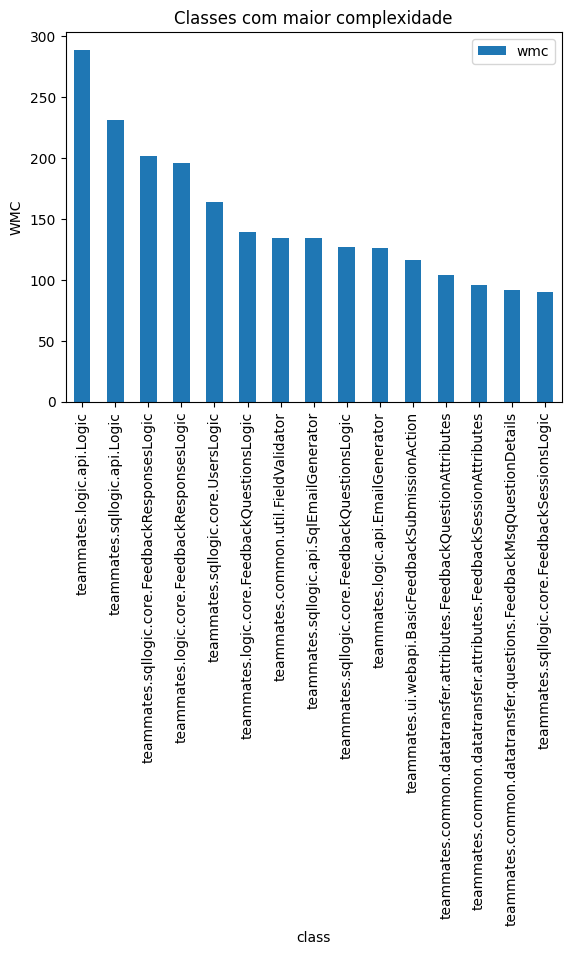

In [ ]:
# Plotar as classes pelo WMC
high_wmc.head(15).sort_values('wmc', ascending=False).plot(
    x='class', y='wmc', kind='bar', title='Classes com maior complexidade')
plt.ylabel('WMC')
plt.show()

Pode-se ver no gráfico anterior que várias classes muito acima da média de complexidade wmc de 17, o que indica o desvio padrão da complexidade ser elevado. Inteverções como as mencionadas nas seções anteriores são necessárias para reduzir essas valores.

In [ ]:
# Proporção de métodos públicos e estáticos em relação ao total
df['proporcao_publicos'] = df['publicMethodsQty'] / df['totalMethodsQty']
df['proporcao_estaticos'] = df['staticMethodsQty'] / df['totalMethodsQty']

# Estatísticas das proporções
print("Proporção de métodos públicos:")
print(df['proporcao_publicos'].describe())

print("Proporção de métodos estáticos:")
print(df['proporcao_estaticos'].describe())


Proporção de métodos públicos:
count    568.000000
mean       0.720030
std        0.318626
min        0.000000
25%        0.500000
50%        0.857143
75%        1.000000
max        1.000000
Name: proporcao_publicos, dtype: float64
Proporção de métodos estáticos:
count    568.000000
mean       0.052115
std        0.158481
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.977778
Name: proporcao_estaticos, dtype: float64


Os dados dos método indicam que dos 568 métodos implementados, 72% são publicos em média, 5 % são estáticos, 25 % das classes têm 50 % dos métodos públicos. Veremos através da matriz de correlação entre cbo, wmc, lcom* e metodos que classes que possuem muitos métodos tendem a ter um nivel de complexidade elevada.

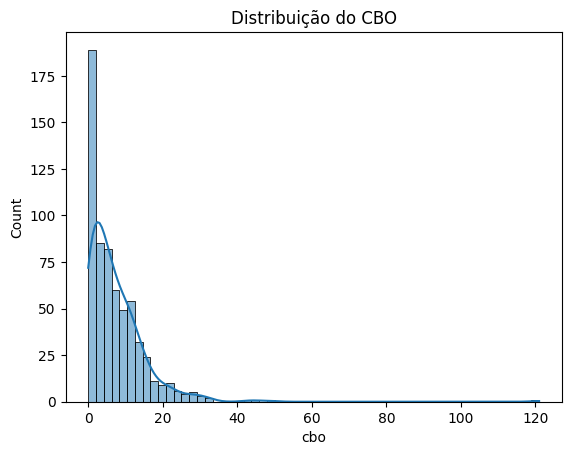

In [ ]:
import matplotlib.pyplot as plt

sns.histplot(df['cbo'], kde=True)
plt.title('Distribuição do CBO')
plt.show()

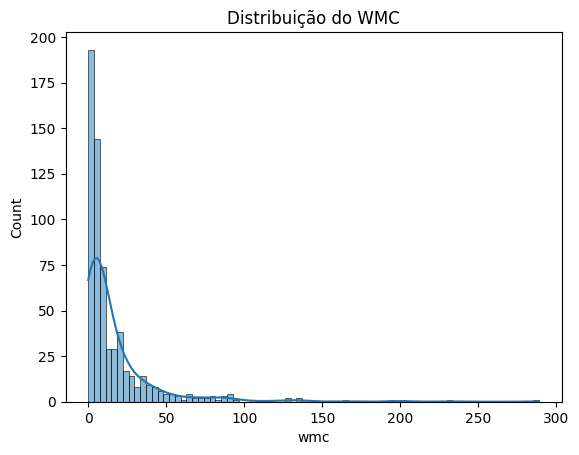

In [ ]:
sns.histplot(df['wmc'], kde=True)
plt.title('Distribuição do WMC')
plt.show()


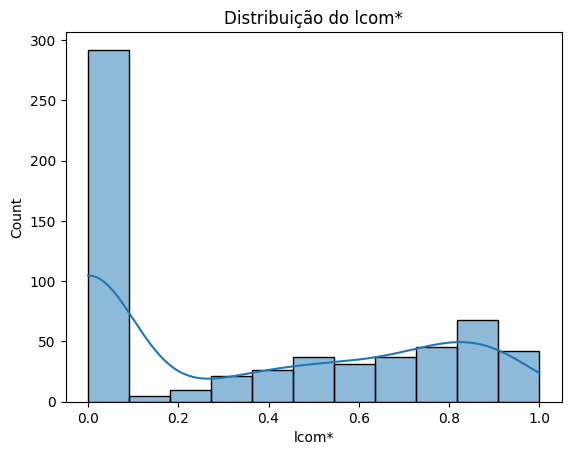

In [ ]:
sns.histplot(df['lcom*'], kde=True)
plt.title('Distribuição do lcom*')
plt.show()


Os gráficos das distribuições acima, mostram que existem poucos outliers e qua a maioria das classes está dentro dos níveis de complexidade, coesão e acoplamento. Porém, destaca-se a o muitas classes possuem lcom* elevado, indicando que o código pode ser refatorado em mais classes.

In [ ]:
# Matriz de correlação
correlacao = df[['cbo', 'wmc', 'lcom*', 'totalMethodsQty']].corr()
print(correlacao)


                      cbo       wmc     lcom*  totalMethodsQty
cbo              1.000000  0.563684  0.363727         0.473870
wmc              0.563684  1.000000  0.497597         0.870572
lcom*            0.363727  0.497597  1.000000         0.581316
totalMethodsQty  0.473870  0.870572  0.581316         1.000000


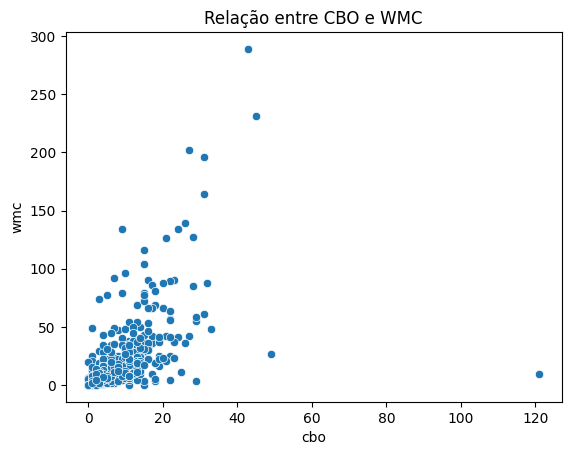

In [ ]:
sns.scatterplot(x='cbo', y='wmc', data=df)
plt.title('Relação entre CBO e WMC')
plt.show()

A matriz de correlação mostra a forte dependência entre número de métodos e complexidade wmc, o que é uma argumento que indica que o código fonte possuem classes que violam pontos como encapsulamento e coesão, necessitando refatoramento das mesmas. Já no gráfico de dispersão é possível observar que a maioria das classes se agrupam em um cluster centrado em (cbo, wmc) = (10,25), e pode-s observar um tendência de quando mais elevado o cbo, maior será a complexidade.

## Conclusão

Neste relatório foi analisado as projeto `TEAMMATES` através de uma inspeção automatizada com as ferramentas `spotbugs`, `CheckStyle` e `pmd`. Essas ferramentas não foram capazes de apontas problemas de implementação e o não uso das boas práticas de programação. A inspeção manual do código mostrou que existem trechos que necessitam de intervenções como utilização padrões `builder` para construtores de classes, teste de consistências de variáveis nulas. Na análise das métricas, o código fonte foi analisado sob a ótica da complexida, acoplamento entre objetos e falta de coesão- wmc, cbo e lcom, respectivamente. Foi possível verificar que muitas classes apresentam alto acoplamento, elevada complexidade e falta de coesão. Em específico, as classes `teammates.sqllogic.api.Logic` e `teammates.logic.api.Logic` apresentam alta complexidade, baixa coesão e forte acoplamento, tornando-se urgente sua refatoração.

Refatorar classes acima para reduzir responsabilidades, modularizar dependências para reduzir o acoplamento podem melhorar esses indicadores.

A análise detalhada utilizando métricas de análise estática como CBO (Coupling Between Objects), WMC (Weighted Methods per Class) e LCOM* (Lack of Cohesion of Methods), algumas classes apresentaram valores muito altos de acoplamento, como a classe ActionFactory (CBO = 121). Isso indica que essas classes possuem muitas dependências externas, dificultando a modularidade e a reutilização.

Classes como Logic e SqlLogic exibiram valores extremamente altos de WMC (231 e 289, respectivamente), indicando alta carga cognitiva para manutenção. Esses valores sugerem que essas classes assumem múltiplas responsabilidades e violam o Princípio de Responsabilidade Única (SRP).

Classes com LCOM* elevado (acima de 0.9), como Logic, demonstraram baixa coesão, indicando que os métodos não compartilham atributos e estão realizando tarefas independentes.

Classes com grande quantidade de métodos públicos, como SqlLogic (158 métodos públicos), expõem uma interface extensa e complexa, comprometendo o encapsulamento. Além disso, classes como HibernateUtil, com predominância de métodos estáticos, funcionam como "utility classes", o que pode ser aceitável, mas requer modularização para maior clareza.

Recomenda-se, portanto, dividir classes grandes e complexas (Logic, SqlLogic) em classes menores, com responsabilidades específicas. Modularizar classes altamente acopladas, como ActionFactory, para reduzir dependências externas.
Reduzir o número de métodos públicos, expondo apenas os que são essenciais.



## Referências

CHIDAMBER, S. R.; KEMERER, C. F. A metrics suite for object oriented design. IEEE Transactions on Software Engineering, v. 20, n. 6, p. 476-493, 1994. Disponível em: https://doi.org/10.1109/32.295895. Acesso em: 10 jan. 2025.

MARTIN, Robert C. Código limpo: habilidades práticas do agile software. Tradução de Robson Chaves. 1. ed. São Paulo: Alta Books, 2009.

TEAMMATES: https://github.com/TEAMMATES/teammates
CK Metrics: https://github.com/mauricioaniche/ck
Chidamber, S.R., and Kemerer, C.F. "A Metrics Suite for Object-Oriented Design." IEEE Transactions on Software Engineering, 1994.

ANICHE, M. CK: Chidamber & Kemerer metrics suite for Java. 2020. Disponível em: https://github.com/mauricioaniche/ck. Acesso em: 10 jan. 2025.

THE SPOTBUGS TEAM. SpotBugs: Find Bugs in Java Programs. 2023. Disponível em: https://spotbugs.github.io/. Acesso em: 10 jan. 2025.